# ParagonCorp "Quantity" Prediction


## Introduction

### NAME
> Adriceda Irsia

### BACKGROUND
> ParagonCorp wants to optimize its financial management and sales, thus outsorces a data scientist, such as myself, for assistance. The job given was to predict the quantity of products for the upcoming period.

### PROBLEM STATEMENT
> Perform TimeSeries model to predict Quantity in the next period from ParagonCorp’s dataset


## External Links
- Data source link: https://github.com/ardhiraka/talent_fair_sample_challenge/tree/main/datasets
- Huggingface Deployment link: https://huggingface.co/spaces/Adriceda/Hacktiv8-Talent-Fair-Vol.-4-Challenge

<br>

## Working Area

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date

from scipy import stats
import seaborn as sns
import matplotlib.dates


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA


##evaluation
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

##save model
import matplotlib.image as mpimg
import pickle


import warnings
warnings.filterwarnings("ignore")


<br>

### I. DATA LOADING

Data source link: https://github.com/ardhiraka/talent_fair_sample_challenge/tree/main/datasets

In [167]:
data = pd.read_csv('sample_dataset_timeseries_noarea.csv')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [169]:
data.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


In [170]:
data.tail(10)

,week_number,week_start_date,week_end_date,product_item,quantity
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102724,2023-14,2023-04-03,2023-04-09,fe92a95f45cfe213258cd8da682cd1a3,9
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102726,2023-14,2023-04-03,2023-04-09,fef44d74d0c1e1d0d9f1c584391eeb60,75
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


<br>

### II. EXPLORATORY DATA ANALYSIS (EDA)

#### a. Data Cleaning

In [171]:
# Changing week_start_date and week_end_date datatype from object into datetime
data.week_start_date = pd.to_datetime(data.week_start_date)
data.week_end_date = pd.to_datetime(data.week_end_date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [172]:
## CHECK DUPLICATE DATA
data.duplicated().sum()

0

In [173]:
## CHECK NULL/MISSING VALUES
data.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [177]:
# View rows with missing data
miss = data[data.isna().any(axis=1)]
print(miss)

      week_number week_start_date week_end_date product_item  quantity
18048     2022-12      2022-03-21    2022-03-27          NaN       119
19536     2022-13      2022-03-28    2022-04-03          NaN       147


In [115]:
## CHECK NULL/MISSING VALUES (after dropping missing values)
## The row with missing values are dropped because not able to determine which product_item
## these missing values are. It could be any of the 2309 existing items or a completely new product

data.dropna(inplace=True)
data.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
dtype: int64

#### b. Descriptive Statistics

In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,102731.0,3191.621964,12074.741009,0.0,75.0,414.0,1890.0,774732.0


In [117]:
data.describe(include='object').T

,count,unique,top,freq
week_number,102731,67,2022-31,1831
product_item,102731,2309,0073377087c7ddace313ff829cd7b0b3,67


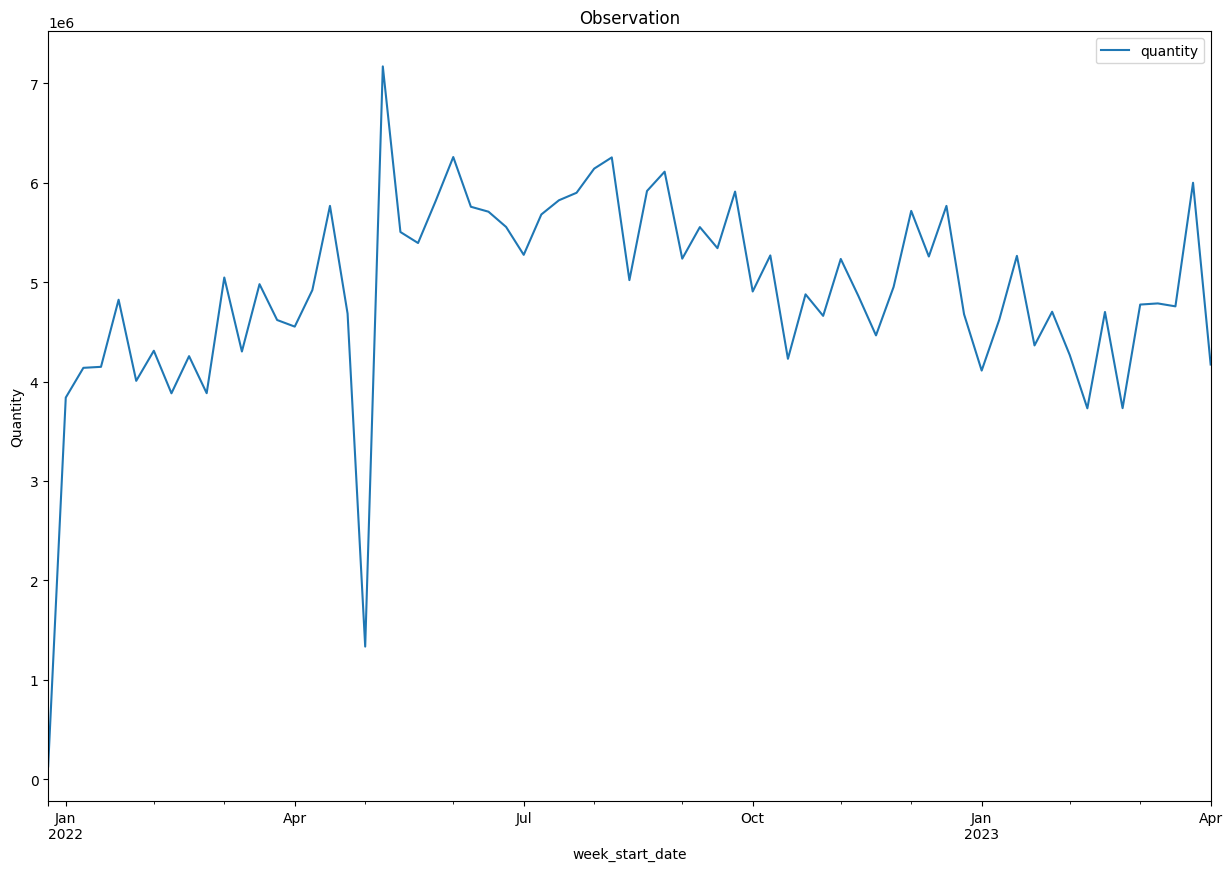

In [118]:
## Plot the timeseries data ('quantity' over time)
# lineGraph -> graph quantity over time
lineGraph = data.groupby('week_start_date')[['quantity']].agg('sum')
observation = lineGraph.plot(figsize = (15,10), legend = True, ylabel = 'Quantity', title = 'Observation').get_figure()

observation.savefig('Observation.png')

In [119]:
# df -> checking time interval
df = data.groupby('week_start_date')[['quantity']].agg('sum')
df = df.reset_index()

# Check time intervals
df['delta'] = df['week_start_date'] - df['week_start_date'].shift(1)
df[['week_start_date', 'delta']]

,week_start_date,delta
0,2021-12-27,NaT
1,2022-01-03,7 days
2,2022-01-10,7 days
3,2022-01-17,7 days
4,2022-01-24,7 days
...,...,...
62,2023-03-06,7 days
63,2023-03-13,7 days
64,2023-03-20,7 days
65,2023-03-27,7 days


In [120]:
df['delta'].sum(), df['delta'].count()

(Timedelta('462 days 00:00:00'), 66)

> The time interval is one week, starting from 2021-12-27 and data is already in chronological order. No varying time intervals detected. 

> 462days/66weeks = 7days

<br>

### III. FEATURE ENGINEERING

In [121]:
# Copying dataframe data into data1
# data is original timeseries imported from csv, NONE - MINIMAL edits allowed. NO ADDED COLUMNS
# data1 is extracted timeseries from csv, but with new columns created for insight
data1 = data.copy()

In [122]:
# Data is in a weekly timeframe
# One year = 52 weeks
# Create numbering to know which week the data is in
# out of the entire given timeframe, instead of just the year. 
week_number = data1['week_number'].unique()
numbering = range(1, len(week_number)+1)

data1['week_index'] = data1['week_number']
data1['week_index'] = data1['week_index'].replace(week_number, numbering)

In [123]:
# Extract year month day from week_start_date
# Extract dayofyear, weekofyear, which quarter the data is dated from week_start_date
# Calculate which season the data is dated in
# 1 year = 12 months = 4 seasons
data1['year'] = pd.DatetimeIndex(data1['week_start_date']).year
data1['month'] = pd.DatetimeIndex(data1['week_start_date']).month
data1['day'] = pd.DatetimeIndex(data1['week_start_date']).day
data1['day_of_year'] = pd.DatetimeIndex(data1['week_start_date']).dayofyear
data1['week_of_year'] = pd.DatetimeIndex(data1['week_start_date']).weekofyear
data1['quarter'] = pd.DatetimeIndex(data1['week_start_date']).quarter
data1['season'] = data1['month'] % 12 // 3 + 1

data1

,week_number,week_start_date,week_end_date,product_item,quantity,week_index,year,month,day,day_of_year,week_of_year,quarter,season
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41,1,2021,12,27,361,52,4,1
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430,1,2021,12,27,361,52,4,1
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4,1,2021,12,27,361,52,4,1
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148,1,2021,12,27,361,52,4,1
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119,1,2021,12,27,361,52,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907,67,2023,4,3,93,14,2,2
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81,67,2023,4,3,93,14,2,2
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16,67,2023,4,3,93,14,2,2
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920,67,2023,4,3,93,14,2,2


#### a. Stationarity

In [124]:
## check stationarity function
# If data not stationary, then data needs to be transformed through 
# transformation or differencing

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("***Stationary***")
    else:
        print("---Non-stationary---")

In [125]:
# df1 -> data used for training model, not splitted yet. 
df1 = data1.groupby('week_start_date')[['quantity']].agg('sum')

# Checking the index of df1
df1.index

DatetimeIndex(['2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25', '2022-05-02', '2022-05-09',
               '2022-05-16', '2022-05-23', '2022-05-30', '2022-06-06',
               '2022-06-13', '2022-06-20', '2022-06-27', '2022-07-04',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26',
               '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
      

In [126]:
# setting freq into 'W-MON' 
# 'W-MON' = weekly frequency starting from monday
# freq in index is meant to be descriptive, no impact on calculations

df1 = df1.asfreq(freq='W-MON')
df1.index

DatetimeIndex(['2021-12-27', '2022-01-03', '2022-01-10', '2022-01-17',
               '2022-01-24', '2022-01-31', '2022-02-07', '2022-02-14',
               '2022-02-21', '2022-02-28', '2022-03-07', '2022-03-14',
               '2022-03-21', '2022-03-28', '2022-04-04', '2022-04-11',
               '2022-04-18', '2022-04-25', '2022-05-02', '2022-05-09',
               '2022-05-16', '2022-05-23', '2022-05-30', '2022-06-06',
               '2022-06-13', '2022-06-20', '2022-06-27', '2022-07-04',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26',
               '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24',
               '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21',
               '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19',
               '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16',
      

In [127]:
check_stationarity(df1['quantity'])

ADF Statistic: -3.328821
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
***Stationary***


#### b. Seasonal Decompose

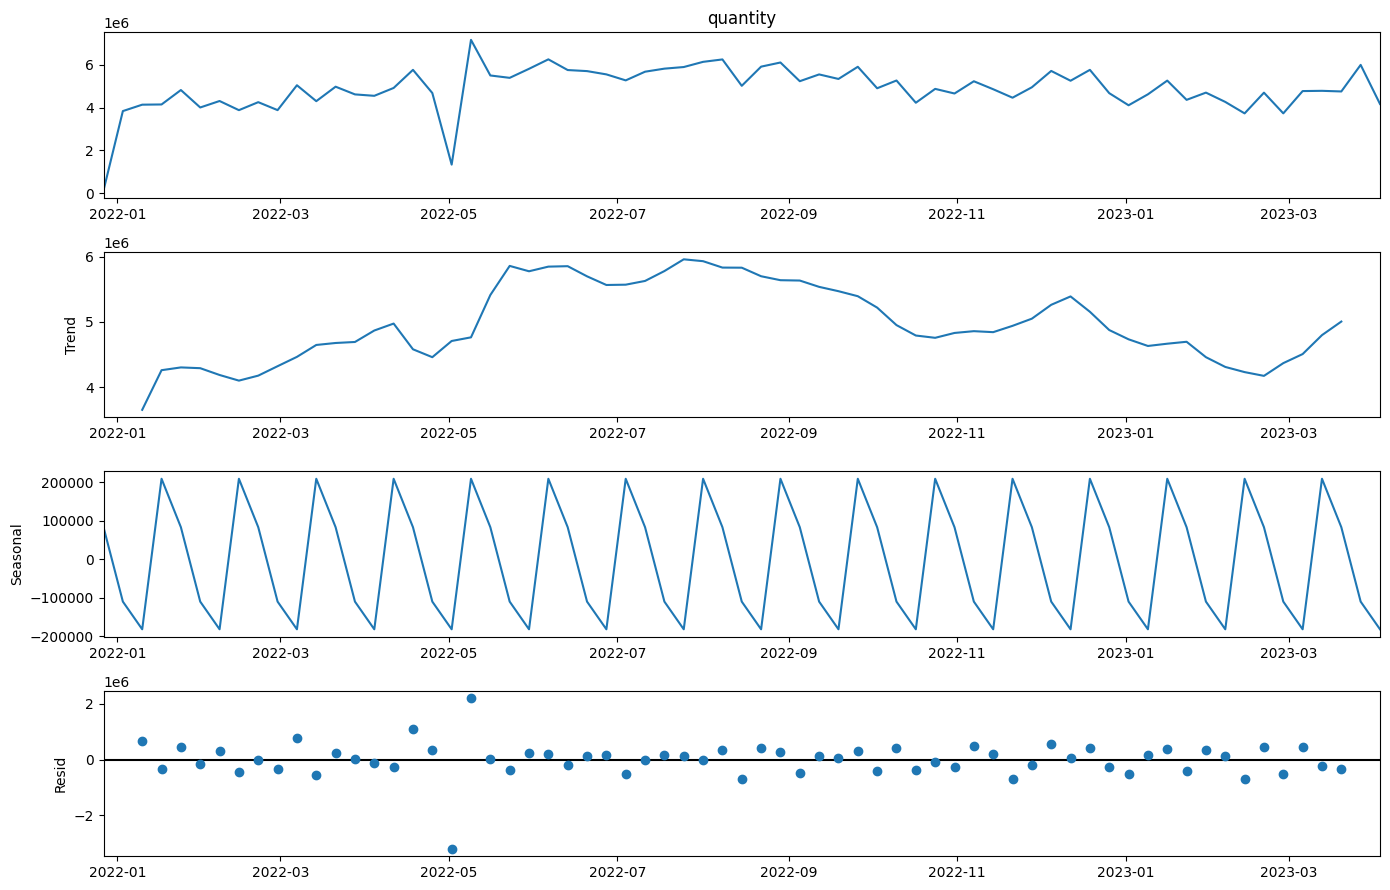

<Figure size 1400x900 with 0 Axes>

In [128]:
pylab.rcParams['figure.figsize'] = (14, 9)

# Trying to look at the data in monthly period, since data are in weekly period, its aggregated into 4 period

#Additive model
decompose1 = seasonal_decompose(df1['quantity'],model='additive', period = 4)
ax=decompose1.plot()
plt.show()

plt.savefig('Decompose_additive.png')

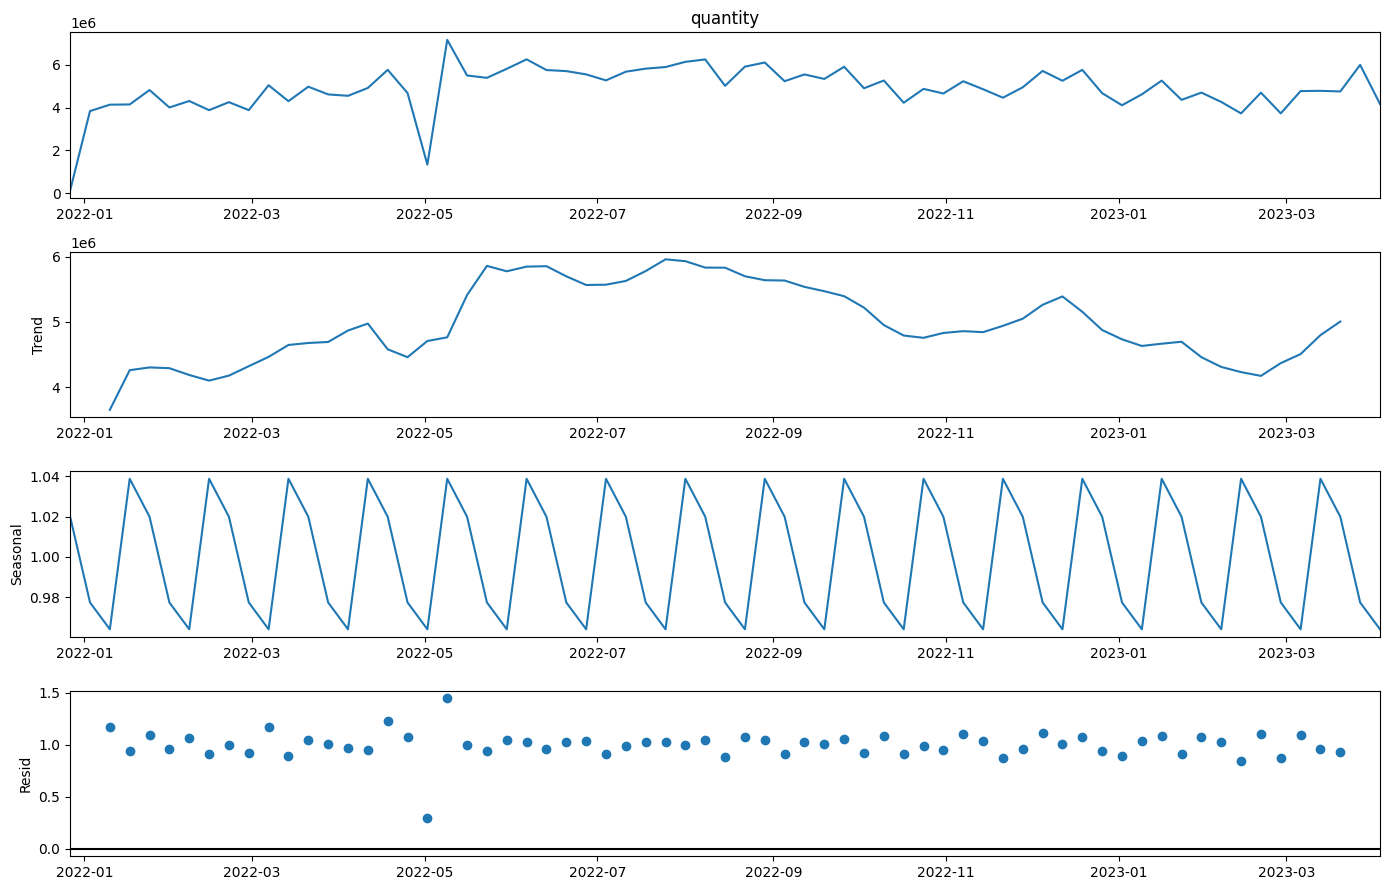

<Figure size 1400x900 with 0 Axes>

In [129]:
# Trying to look at the data in monthly period, since data are in weekly period, its aggregated into 4 period period

#Multiplicative model
decompose2 = seasonal_decompose(df1['quantity'],model='multiplicative', period = 4)
ax=decompose2.plot()
plt.show()

plt.savefig('Decompose_multiplicative.png')

> From seasonal decomposition of data, it can be observed that data did not have a linear trend. Also residual in multiplicative data is smaller than the residual in additive model. Thus, it can be concluded that the data given is a multiplicative timeseries.  

#### c. Autocorrelation

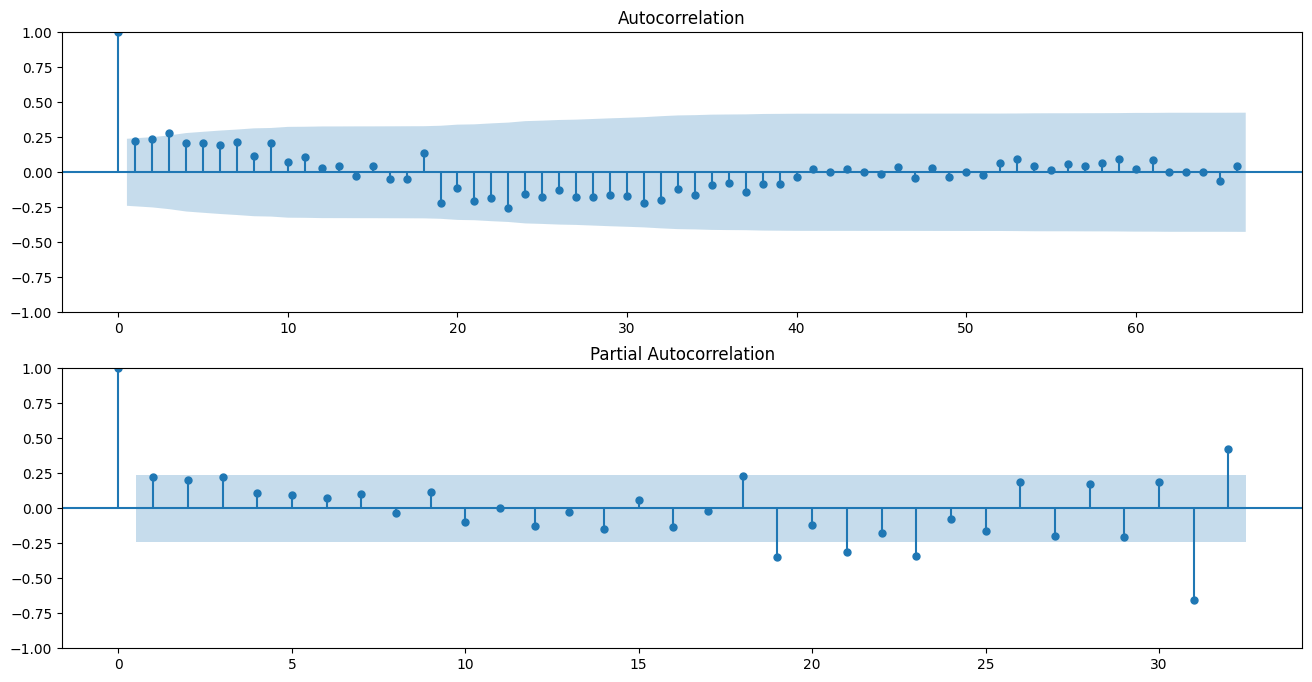

<Figure size 1400x900 with 0 Axes>

In [130]:
# Plot autocorrelation and partial autocorrelation 
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df1['quantity'], lags = 66, ax=ax[0])
plot_pacf(df1['quantity'], lags = 32, ax=ax[1])

plt.show()

plt.savefig('Autocorrelation.png')

> Autocorrelation and partial autocorrelation helps in finding the q and p parameter respectively in the ARIMA function. ARIMA(endog, order = (p,d,q))

> q value = 3

> p value = 19, 21, 23, 31, 32

<br>

### IV. MODEL DEFINITION

> Forecasting models that will be utilized are

- Naive Approach
- Simple Average
- Simple Exponential Smoothing (SES)
- Holt Linear Trend
- Holt-Winters
- Autoregressive
- ARIMA

> Evaluation metrics that will be utilized are
- Mean Absolute Error (MAE)
- Mean Absolute Pecentage Error (MAPE)
- Root Mean Squared Error (RMSE)

> The lower the value, the better the prediction done by model

<br>

### V. MODEL TRAINING

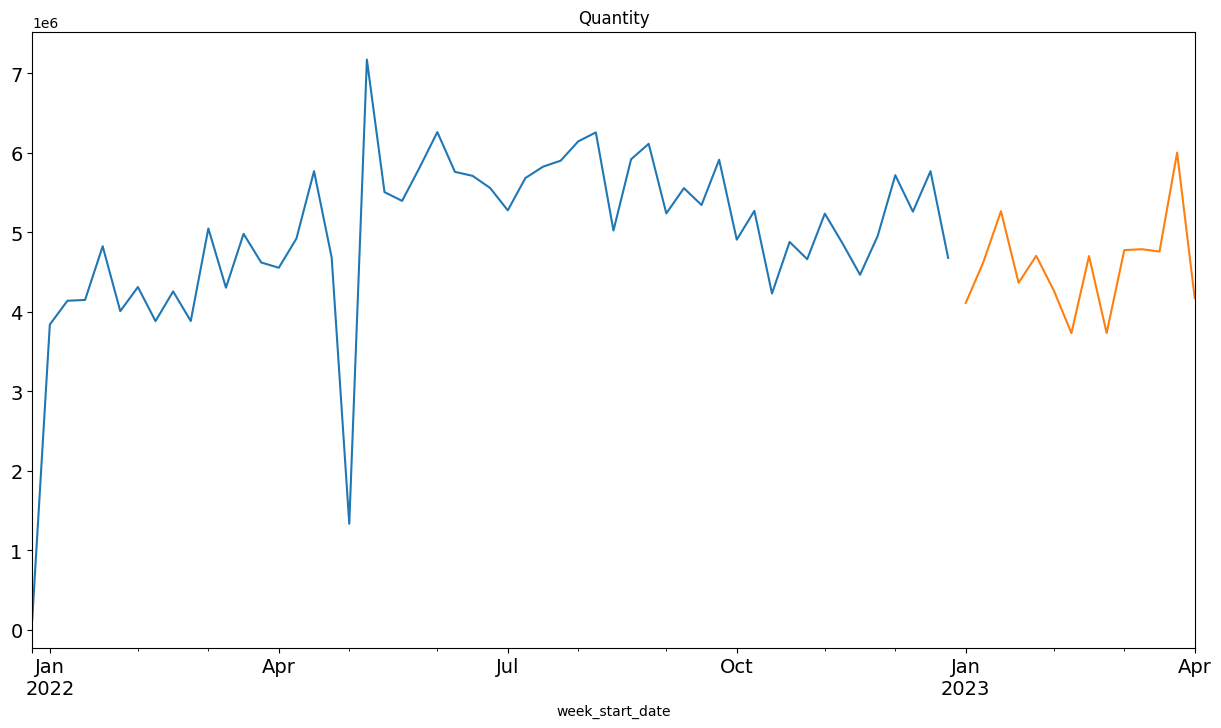

(53, 1)
(14, 1)


In [178]:
#splitting train and test
#Train -> before 2023
#Test -> 2023
#Goal is to train the model to predict the quantity in 2023

train=df1[0:53]
test=df1[53:]

train.quantity.plot(figsize=(15,8), title= 'Quantity', fontsize=14)
test.quantity.plot(figsize=(15,8), title= 'Quantity', fontsize=14)

plt.show()

print(train.shape)
print(test.shape)

In [132]:
check_stationarity(train['quantity'])

ADF Statistic: -7.196339
p-value: 0.000000
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
***Stationary***


In [133]:
check_stationarity(test['quantity'])

ADF Statistic: -3.296204
p-value: 0.015049
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
***Stationary***


#### a. Naive Approach

> Naive Approach assumes that value is stable throughout its time period. Forecasts produced using a naive approach are equal to the final observed value

In [134]:
dd= np.asarray(train.quantity)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

#### b. Simple Average

> Simple Average forecasting the value of the next period by average of all the past periods

In [135]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['quantity'].mean()

#### c. SES

> Simple Exponential Smoothing are forecasts produced using exponential smoothing methods, which are weighted averages of past observations with the weights decaying exponentially as the observations get older. The more recent the observation, the higher the associated weight. 

In [136]:
y_hat_avg1 = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['quantity'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg1['SES'] = fit2.forecast(len(test))

#### d. Holt Linear Trend

> Holt's Linear Trend extended simple exponential smoothing to allow forecasting of data with a trend. It is exponential smoothing applied to both level (the average value in the series) and trend. 

In [137]:
y_hat_avg2 = test.copy()
fit1 = Holt(np.asarray(train['quantity'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg2['Holt_linear'] = fit1.forecast(len(test))

#### e. Holt-Winters

> Holt's Winters method seasonal method comprises the forecast equation and three smoothing equations. One for the level, one for trend and one for seasonal component with smoothing parameters.

In [138]:
y_hat_avg3 = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['quantity']) ,seasonal_periods=4 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg3['Holt_Winter'] = fit1.forecast(len(test))

#### f. Autoregressive

> Autoregressive model is a time series regression model that relates the actual observed value to the previous observed value. This can be done when an observation cannot be separated from previous observations. The basic concept of this model is to regress the actual observation with the previous observation value to forecast the future value.

p value = 19, 21, 23, 31, 32

In [179]:
model00 = ARIMA(train, order=(19,0,0))
model_fit00 = model00.fit()
predictions00 = model_fit00.predict(start='2023-01-02', end='2023-04-03')

model01 = ARIMA(train, order=(21,0,0))
model_fit01 = model01.fit()
predictions01 = model_fit01.predict(start='2023-01-02', end='2023-04-03')

model02 = ARIMA(train, order=(23,0,0))
model_fit02 = model02.fit()
predictions02 = model_fit02.predict(start='2023-01-02', end='2023-04-03')

model03 = ARIMA(train, order=(31,0,0))
model_fit03 = model03.fit()
predictions03 = model_fit03.predict(start='2023-01-02', end='2023-04-03')

model04 = ARIMA(train, order=(32,0,0))
model_fit04 = model04.fit()
predictions04 = model_fit04.predict(start='2023-01-02', end='2023-04-03')

print('p = 19')
print("mae :", mean_absolute_error(test, predictions00))
print("mape :", mean_absolute_percentage_error(test,predictions00))
print("rmse :", sqrt(mean_squared_error(test, predictions00)))
print('-'*50)
print('p = 21')
print("mae :", mean_absolute_error(test, predictions01))
print("mape :", mean_absolute_percentage_error(test,predictions01))
print("rmse :", sqrt(mean_squared_error(test, predictions01)))
print('-'*50)
print('p = 23')
print("mae :", mean_absolute_error(test, predictions02))
print("mape :", mean_absolute_percentage_error(test,predictions02))
print("rmse :", sqrt(mean_squared_error(test, predictions02)))
print('-'*50)
print('p = 31')
print("mae :", mean_absolute_error(test, predictions03))
print("mape :", mean_absolute_percentage_error(test,predictions03))
print("rmse :", sqrt(mean_squared_error(test, predictions03)))
print('-'*50)
print('p = 32')
print("mae :", mean_absolute_error(test, predictions04))
print("mape :", mean_absolute_percentage_error(test,predictions04))
print("rmse :", sqrt(mean_squared_error(test, predictions04)))

p = 19
mae : 645540.8867315861
mape : 0.15231279675898274
rmse : 859625.1542406823
--------------------------------------------------
p = 21
mae : 486149.43425252504
mape : 0.10969412408078097
rmse : 695098.1486392439
--------------------------------------------------
p = 23
mae : 596991.0921326759
mape : 0.13309532380922617
rmse : 708985.5556455444
--------------------------------------------------
p = 31
mae : 1479854.7877213645
mape : 0.3379849241435318
rmse : 1754919.0316604788
--------------------------------------------------
p = 32
mae : 716955.4416688225
mape : 0.15833497862438387
rmse : 1005176.0029863695


model with p-value = 21 has the best performance, amongst the different autoregressive models

#### g. ARIMA

> ARIMA is a class of models that learns a given time series' past values to forecast, or predict, future values.

q value = 3

In [140]:
model2 = ARIMA(train, order=(21,0,3))
model_fit2 = model2.fit()
predictions2 = model_fit2.predict(start='2023-01-02', end='2023-04-03')

<br>

### VI. MODEL EVALUATION

> Each model will be plotted, visualizing how the prediciton fit with the test. Then Evaluation metrics will be calculated to understand how well, or accurate, the model performs. The Evaluation metrics of each data will be compiled into one dataframe at the end for comparison.

#### a. Naive Approach

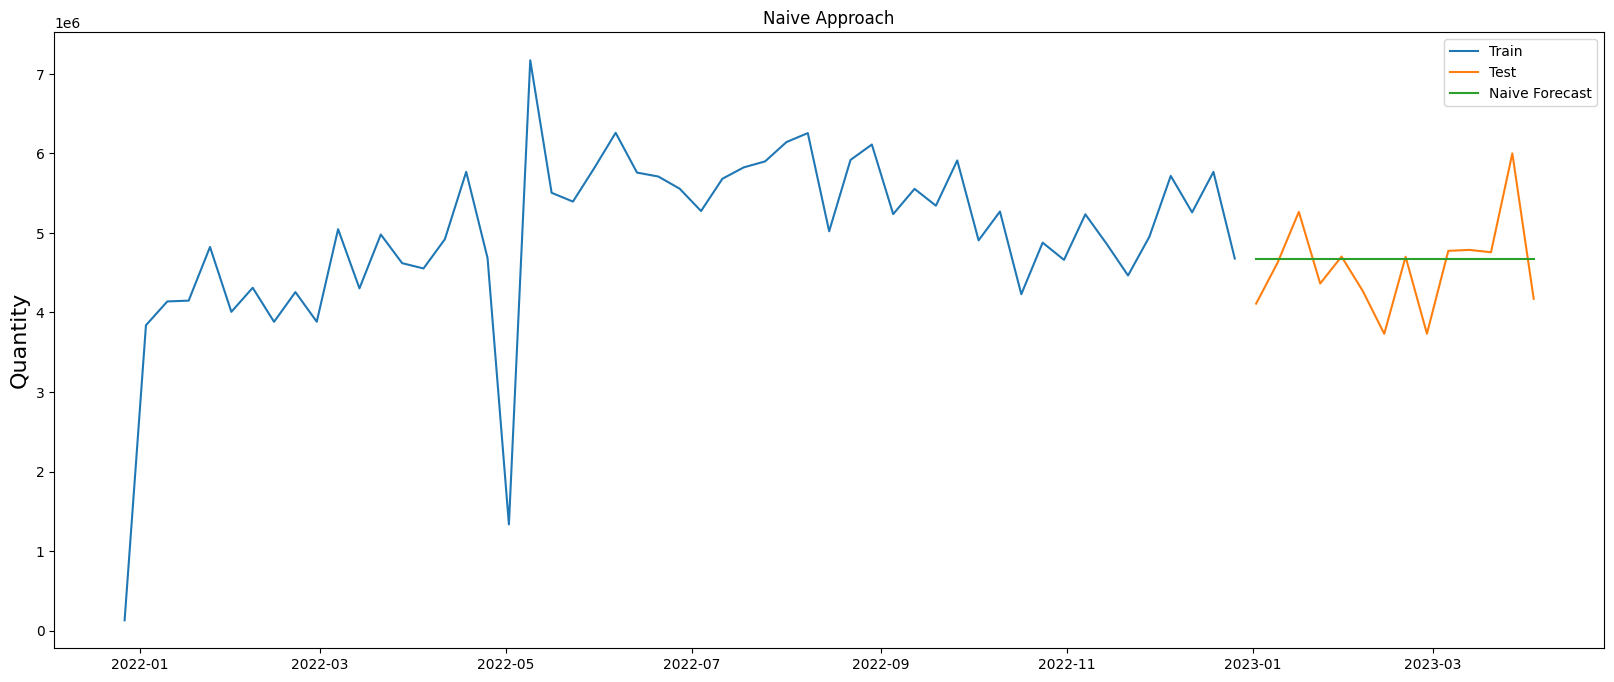

In [207]:
# Naive Approach
plt.figure(figsize=(20,8))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index,test['quantity'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.ylabel('Quantity', fontsize=16)
plt.savefig('Naive.png')

plt.show()



In [208]:
print("mae :", mean_absolute_error(test, y_hat['naive']))
print("mape :", mean_absolute_percentage_error(test, y_hat['naive']))
print("rmse :", sqrt(mean_squared_error(test, y_hat['naive'])))

mae1 = mean_absolute_error(test, y_hat['naive'])
mape1 = mean_absolute_percentage_error(test, y_hat['naive'])
rmse1 = sqrt(mean_squared_error(test, y_hat['naive']))

mae : 427672.5714285714
mape : 0.09627584155063598
rmse : 583107.6158442551


#### b. Simple Average

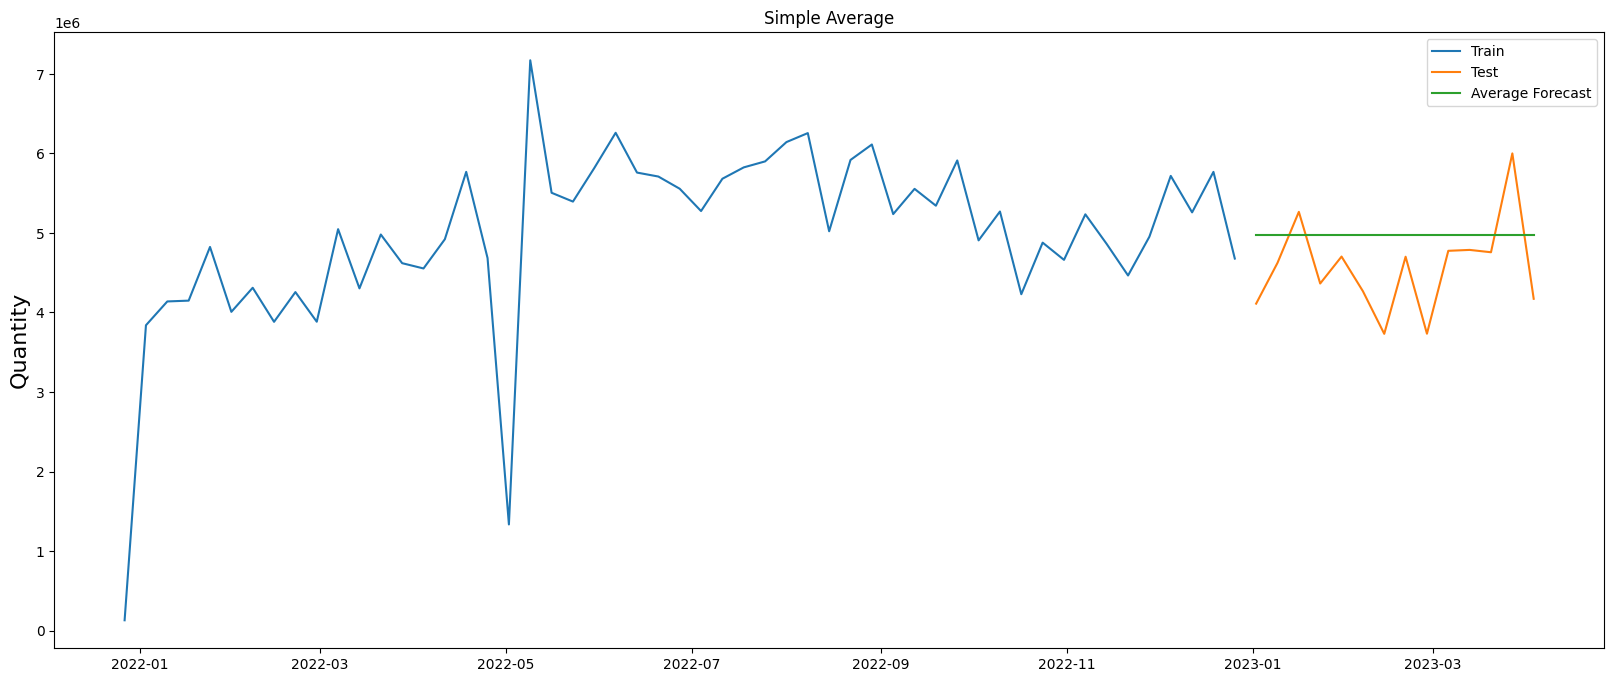

In [209]:
# Simple Average
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.ylabel('Quantity', fontsize=16)
plt.title("Simple Average")
plt.savefig('Simple_Average.png')

plt.show()



In [210]:
print("mae :", mean_absolute_error(test, y_hat_avg['avg_forecast']))
print("mape :", mean_absolute_percentage_error(test, y_hat_avg['avg_forecast']))
print("rmse :", sqrt(mean_squared_error(test, y_hat_avg['avg_forecast'])))

mae2 = mean_absolute_error(test, y_hat_avg['avg_forecast'])
mape2 = mean_absolute_percentage_error(test, y_hat_avg['avg_forecast'])
rmse2 = sqrt(mean_squared_error(test, y_hat_avg['avg_forecast']))

mae : 594754.4393530994
mape : 0.13772451369259095
rmse : 703467.0597199175


#### c. SES

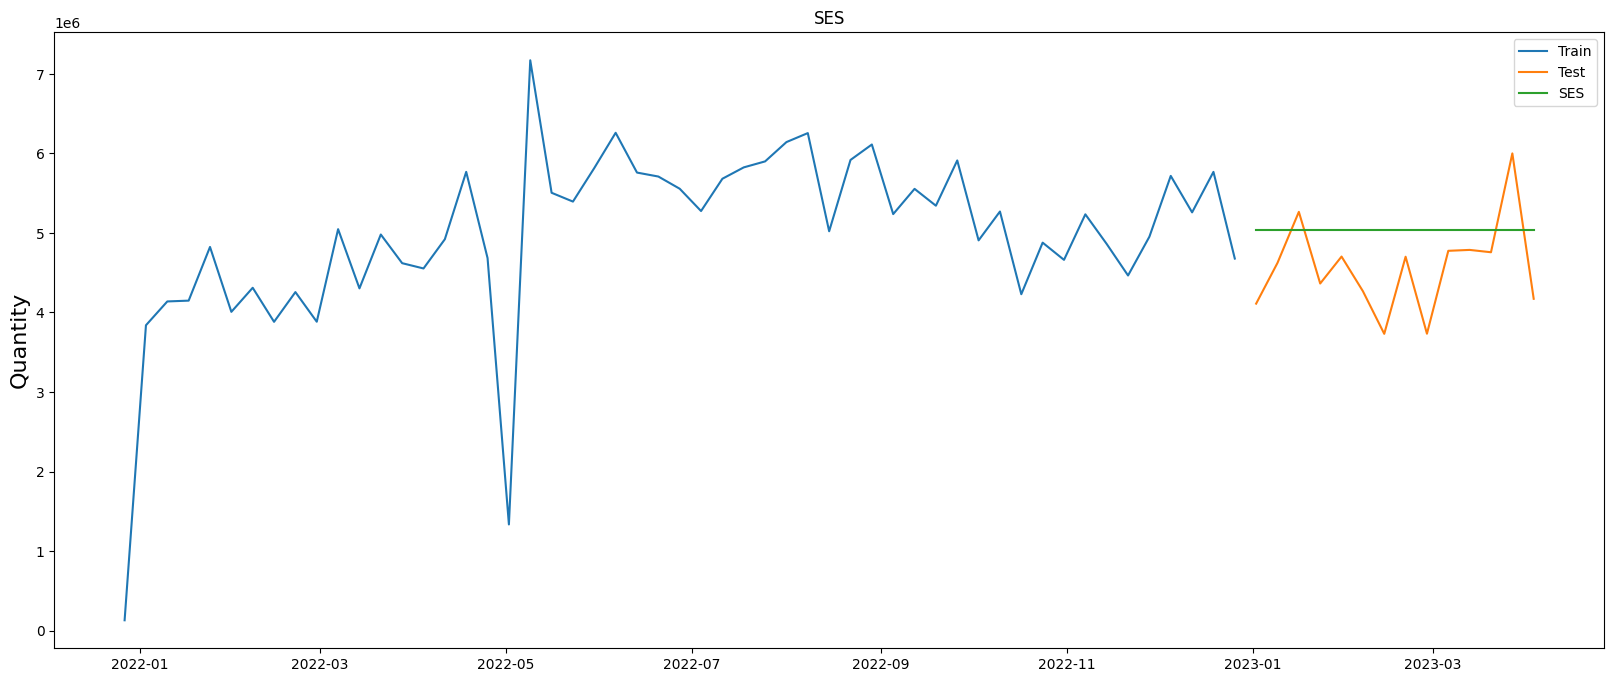

In [211]:
# SES
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg1['SES'], label='SES')
plt.legend(loc='best')
plt.ylabel('Quantity', fontsize=16)
plt.title("SES")
plt.savefig('SES.png')

plt.show()



In [212]:
print("mae :", mean_absolute_error(test, y_hat_avg1['SES']))
print("mape :", mean_absolute_percentage_error(test, y_hat_avg1['SES']))
print("rmse :", sqrt(mean_squared_error(test, y_hat_avg1['SES'])))

mae3 = mean_absolute_error(test, y_hat_avg1['SES'])
mape3 = mean_absolute_percentage_error(test, y_hat_avg1['SES'])
rmse3 = sqrt(mean_squared_error(test, y_hat_avg1['SES']))

mae : 637936.346875905
mape : 0.14806974440323906
rmse : 740150.2923796257


#### d. Holt Linear Trend

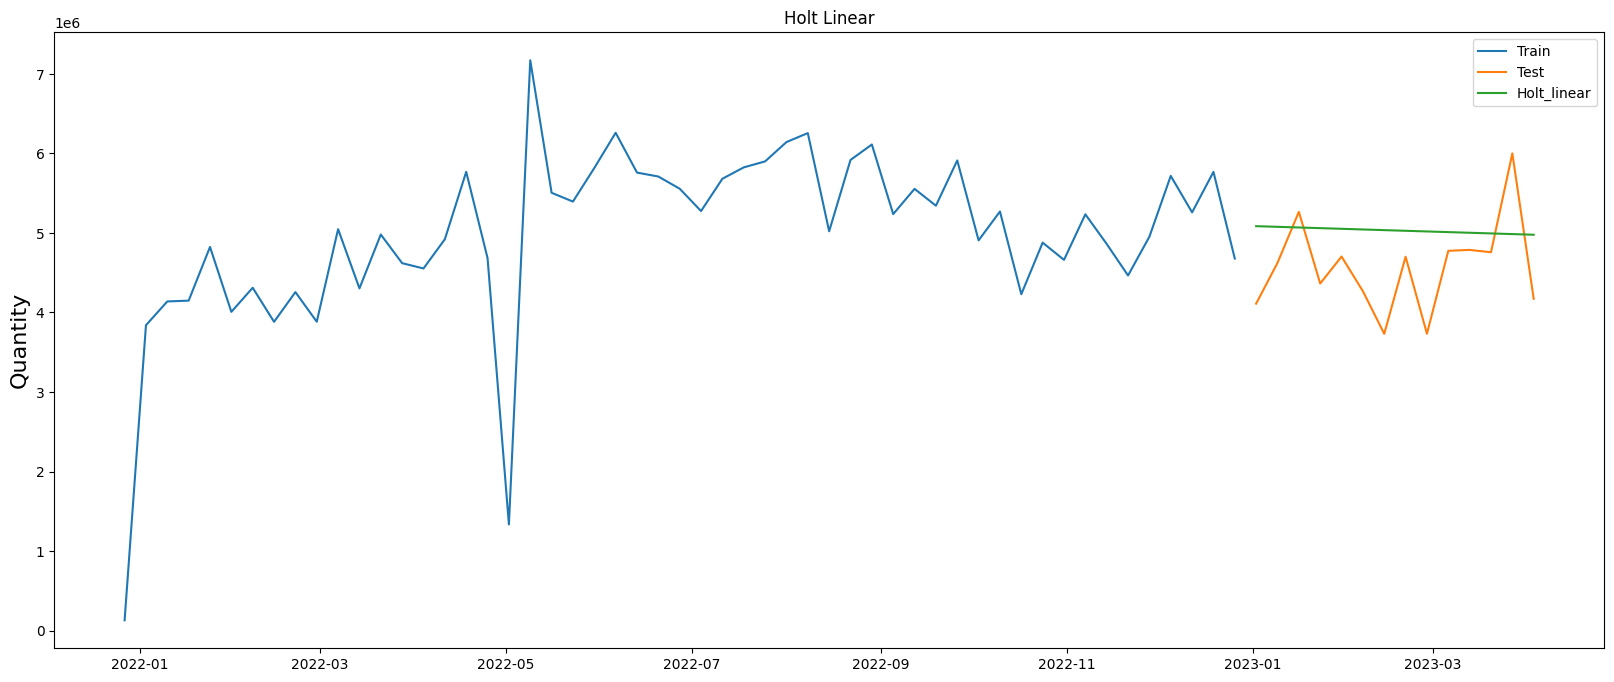

In [213]:
# HOLT LINEAR TREND
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg2['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt Linear")
plt.ylabel('Quantity', fontsize=16)
plt.savefig('Holt_Linear.png')

plt.show()



In [214]:
print("mae :", mean_absolute_error(test, y_hat_avg2['Holt_linear']))
print("mape :", mean_absolute_percentage_error(test, y_hat_avg2['Holt_linear']))
print("rmse :", sqrt(mean_squared_error(test, y_hat_avg2['Holt_linear'])))


mae4 = mean_absolute_error(test, y_hat_avg2['Holt_linear'])
mape4 = mean_absolute_percentage_error(test, y_hat_avg2['Holt_linear'])
rmse4 = sqrt(mean_squared_error(test, y_hat_avg2['Holt_linear']))

mae : 633681.3139936065
mape : 0.14699429150708393
rmse : 741752.524844148


#### e. Holt-Winters

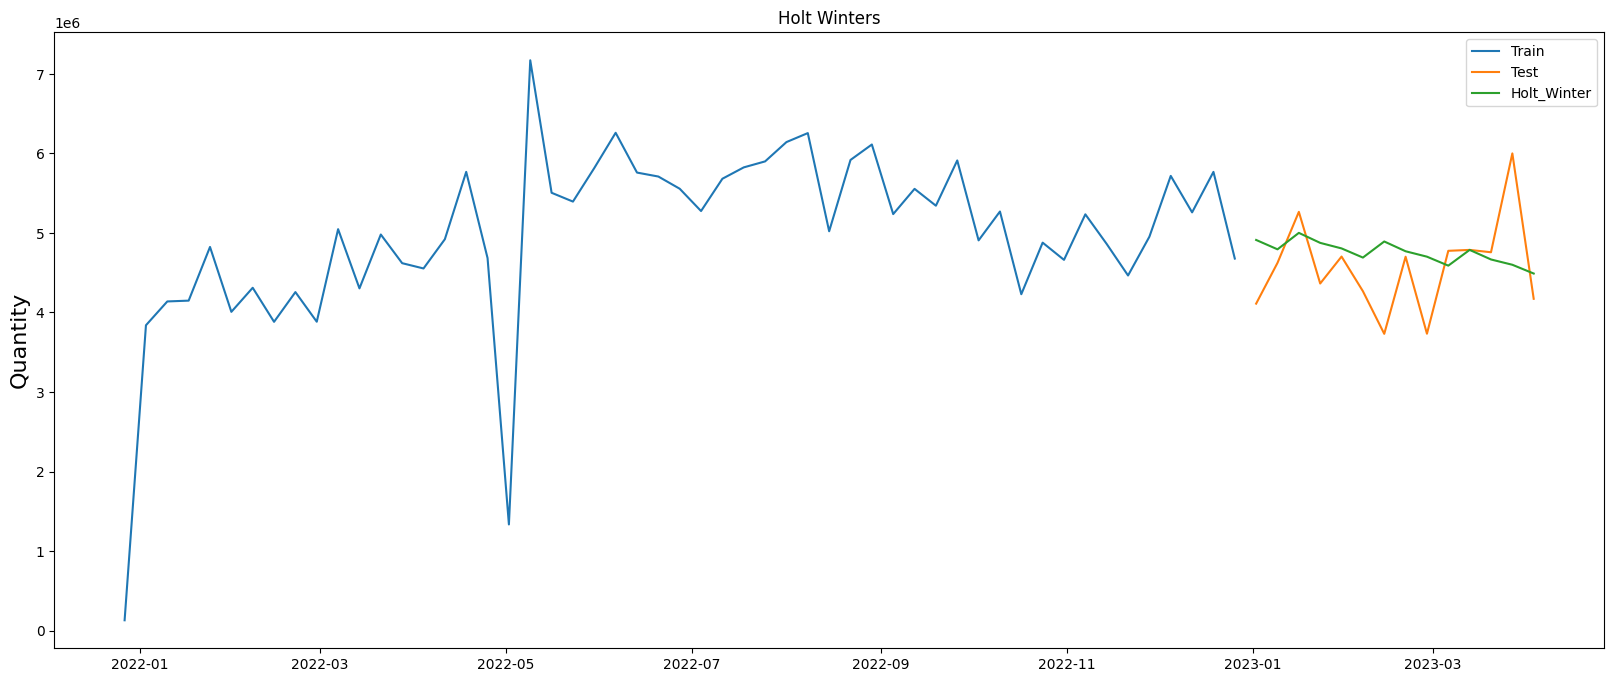

In [215]:
# HOLT-WINTERS
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg3['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Quantity', fontsize=16)
plt.title("Holt Winters")
plt.savefig('Holt_Winters.png')

plt.show()



In [216]:
print("mae :", mean_absolute_error(test, y_hat_avg3['Holt_Winter']))
print("mape :", mean_absolute_percentage_error(test,y_hat_avg3['Holt_Winter']))
print("rmse :", sqrt(mean_squared_error(test, y_hat_avg3['Holt_Winter'])))

mae5 = mean_absolute_error(test, y_hat_avg3['Holt_Winter'])
mape5 = mean_absolute_percentage_error(test, y_hat_avg3['Holt_Winter'])
rmse5 = sqrt(mean_squared_error(test, y_hat_avg3['Holt_Winter']))

mae : 461955.06117916264
mape : 0.10521717436869053
rmse : 631896.6540059707


#### f. Autoregressive

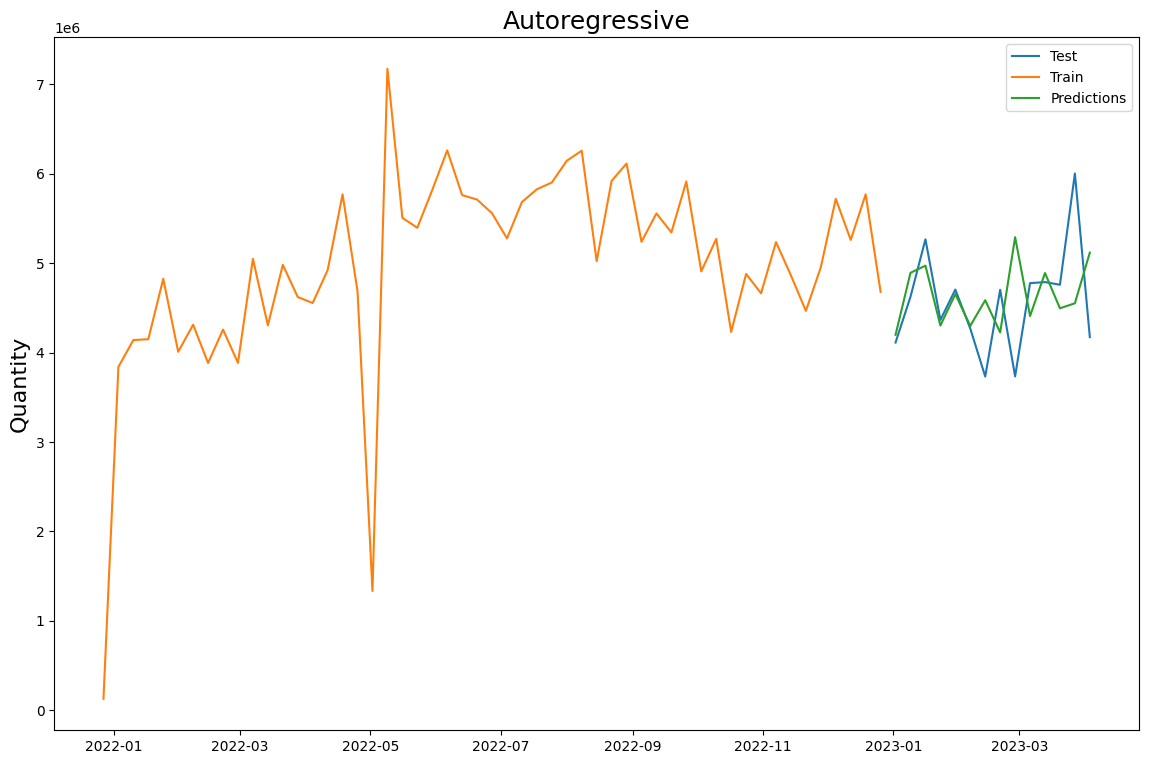

In [217]:
# Autoregressive
plt.plot(test)
plt.plot(train)
plt.plot(predictions01)

plt.legend(('Test', 'Train' ,'Predictions'), fontsize=10)
plt.title('Autoregressive', fontsize=18)
plt.ylabel('Quantity', fontsize=16)

plt.savefig('Autoreg.png')

In [218]:
print("mae :", mean_absolute_error(test, predictions01))
print("mape :", mean_absolute_percentage_error(test,predictions01))
print("rmse :", sqrt(mean_squared_error(test, predictions01)))

mae6 = mean_absolute_error(test, predictions01)
mape6 = mean_absolute_percentage_error(test, predictions01)
rmse6 = sqrt(mean_squared_error(test, predictions01))

mae : 486149.43425252504
mape : 0.10969412408078097
rmse : 695098.1486392439


#### g. ARIMA

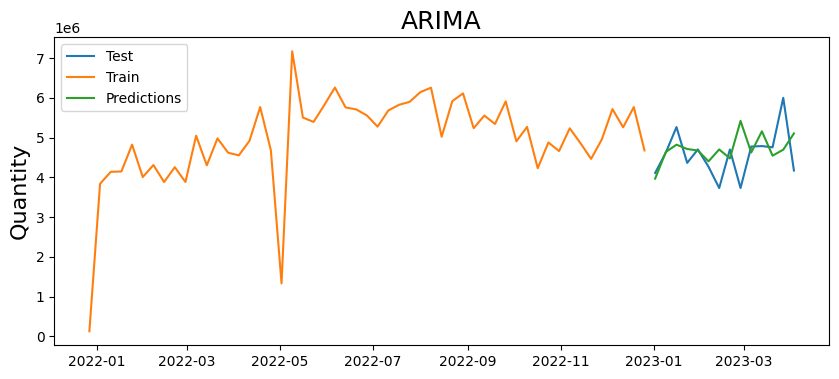

In [219]:
# Auto-Regressive Integrated Moving Averages
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(train)
plt.plot(predictions2)

plt.legend(('Test', 'Train', 'Predictions'), fontsize=10)
plt.title('ARIMA', fontsize=18)
plt.ylabel('Quantity', fontsize=16)

plt.savefig('ARIMA.png')

In [220]:
print("mae :", mean_absolute_error(test, predictions2))
print("mape :", mean_absolute_percentage_error(test,predictions2))
print("rmse :", sqrt(mean_squared_error(test, predictions2)))

mae7 = mean_absolute_error(test, predictions2)
mape7 = mean_absolute_percentage_error(test, predictions2)
rmse7 = sqrt(mean_squared_error(test, predictions2))

mae : 497664.74969572236
mape : 0.1138838198108384
rmse : 705898.5595742365


In [221]:
d = {'Evaluation Metric': ['Naive', 'Simple Average', 'SES', 'Holt Linear', 'Holt-Winters', 'Autoregressive', 'ARIMA'], 
     'Mean Absolute Error': [mae1, mae2, mae3, mae4, mae5, mae6, mae7],
     'Mean Absolute Percentage Error': [mape1, mape2, mape3, mape4, mape5, mape6, mape7],
     'Root Mean Squared Error': [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7]
     }
evaluation_metric = pd.DataFrame(data=d)
evaluation_metric

,Evaluation Metric,Mean Absolute Error,Mean Absolute Percentage Error,Root Mean Squared Error
0,Naive,427672.571429,0.096276,583107.615844
1,Simple Average,594754.439353,0.137725,703467.059720
2,SES,637936.346876,0.148070,740150.292380
3,Holt Linear,633681.313994,0.146994,741752.524844
4,Holt-Winters,461955.061179,0.105217,631896.654006
5,Autoregressive,486149.434253,0.109694,695098.148639
6,ARIMA,497664.749696,0.113884,705898.559574


> Model ordered from Best to Worst

Mean Absolute Error
- NAIVE
- HOLT-WINTERS
- AUTOREGRESSIVE
- ARIMA
- SIMPLE AVERAGE
- HOLT LINEAR
- SES

Root Mean Squared Error
- NAIVE
- HOLT-WINTERS
- AUTOREGRESSIVE
- SIMPLE AVERAGE
- ARIMA
- SES
- HOLT LINEAR


> From the evaluation metrics, it can be observed that NAIVE APPROACH has the best performance out of all the models. With HOLT-WINTERS and AUTOREGRESSIVE in 2nd and 3rd best respectively. But prediction from NAIVE APPROACH is only a straight line visually, incapable of predicting the upward and downward trends within the test timeframe. 

> HOLT-WINTERS is the 2nd best model and capable of predicting the upward and downward trends of quantity. Thus, the final model that will be used is HOLT-WINTERS with percentage error of ≈ 10.5%.

<br>

### VII. MODEL SAVING

> Files saved:

- Observation.png
- Decompose_additive.png
- Decompose_multiplicative.png
- Autocorrelation.png
- Naive.png
- Simple_Average.png
- SES.png
- Holt_Linear.png
- Holt_Winters.png
- Autoreg.png
- ARIMA.png

<br>

### VIII. MODEL INFERENCE

> Huggingface Deployment link: https://huggingface.co/spaces/Adriceda/Hacktiv8-Talent-Fair-Vol.-4-Challenge

In [222]:
# Show/Import data needs prediciton
data

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [223]:
# groupby data based on the dates and sum the quantity
df1

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


In [224]:
# Check stationarity of grouped data
check_stationarity(df1['quantity'])

ADF Statistic: -3.328821
p-value: 0.013638
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
***Stationary***


In [227]:
# Implement HOLT-WINTERS timeseries prediciton model
y_hat_avg3 = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['quantity']) ,seasonal_periods=4 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg3['Holt_Winter'] = fit1.forecast(len(test))


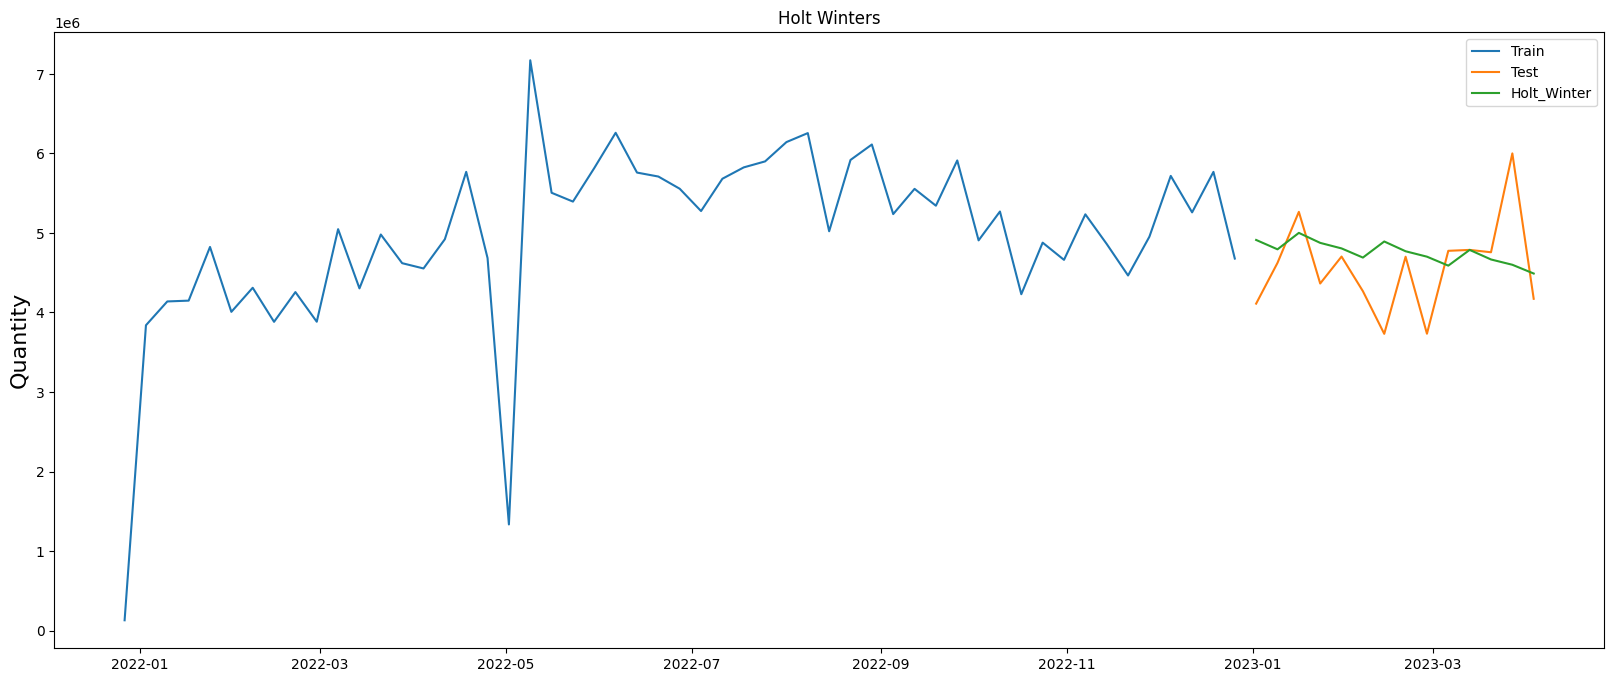

In [228]:
# Plot prediciton
plt.figure(figsize=(20,8))
plt.plot(train['quantity'], label='Train')
plt.plot(test['quantity'], label='Test')
plt.plot(y_hat_avg3['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Quantity', fontsize=16)
plt.title("Holt Winters")

plt.show()

In [241]:
# Predicted Quantity
indexing = y_hat_avg3.index.tolist()

print("Date: ", indexing[len(y_hat_avg3['Holt_Winter']) - 1])
print("Quantity: ", y_hat_avg3['Holt_Winter'][len(y_hat_avg3['Holt_Winter']) - 1])


Date:  2023-04-03 00:00:00
Quantity:  4489918.064505972


<br>

------

## Conclusion

> From EDA of data, the data timeframe is from 2021-12-27 to 2023-04-03, with interval of one week and in chronological order. With seasonal decomposition, it was identified that data given is a multiplicative timeseries.

> Evaluating the models, HOLT-WINTERS is the most applicable model, even though it loses to NAIVE APPROACH in terms of accuracy. This is due to HOLT-WINTERS capability of predicting upward and downward trends and having the 2nd best performance behind NAIVE. HOLT-WINTERS have a MEAN ABSOLUTE ERROR of 461955.061179, MEAN ABSOLUTE PERCENTAGE ERROR of 0.105217 and ROOT MEAN SQUARED ERROR of 631896.654006